<a href="https://colab.research.google.com/github/Yosralla23/Yosralla23/blob/main/Data_Analysis_Uber_Yosralla_Ibrahim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Read data
data=pd.read_csv('Uber Request Data.csv',encoding='utf-8')

In [ ]:
#Display some samples from the data
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
'''
print information about data. First we get 6745 entries which is the number of rows.
And 6 columns.It shows the data type of each column and it seems that 'Request timestamp' and 'Drop timestamp'
column their data types are text, however we can convert the data type into date so that it can be easily used.

Also from the information given, we could see that there some NULL values in Driver id column and Drop timestamp.
We could predict that null values in drop timestamp that maybe the trip is cancelled or not completed.
'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
data.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [ ]:
'''
We have only three types of stauts either Trip completed,Cancelled, or No cars Available
'''
data['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [ ]:
#to count each type have appeared
data['Status'].value_counts()

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

<Axes: ylabel='count'>

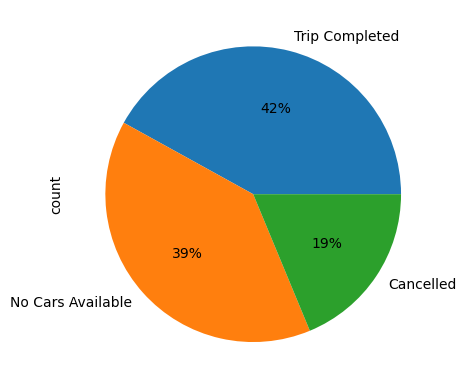

In [ ]:
# We could see that Trip completed is the highest, then no cars available, and then trip is cancelled with 19%
data['Status'].value_counts().plot.pie(autopct="%1.0f%%")

In [ ]:
#there are only two locations from airport or city
data['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

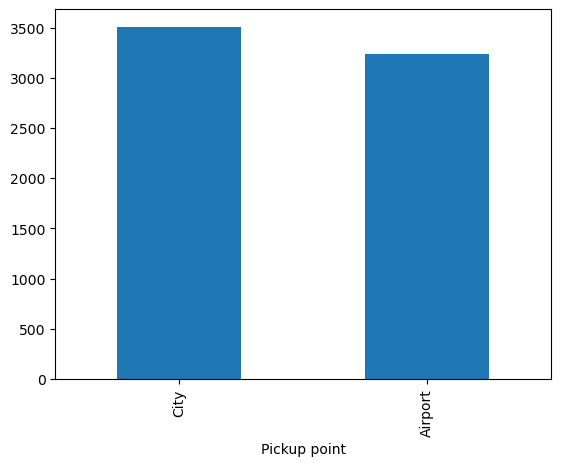

In [ ]:
'''
i visualized by using bar plot & pie chart we could see that the diffrence is not huge.The city is only higher by 4% than Airport
'''
data['Pickup point'].value_counts().plot.bar()
plt.show()

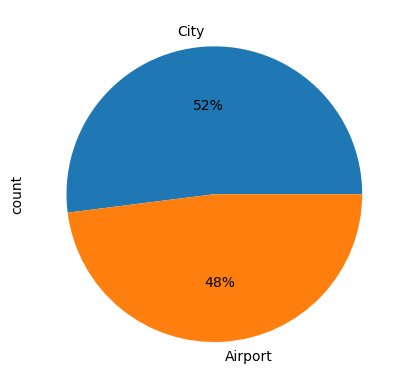

In [ ]:
data['Pickup point'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

<Axes: xlabel='Pickup point', ylabel='count'>

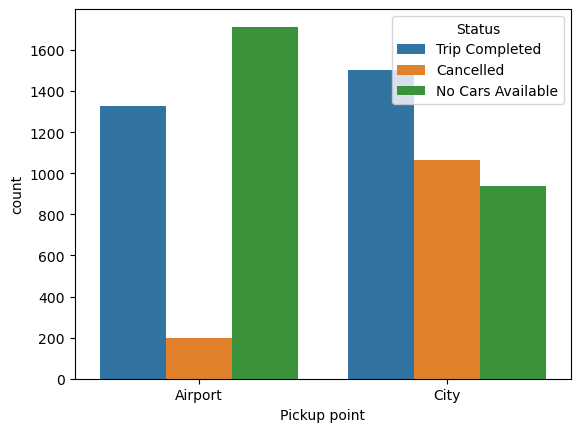

In [ ]:
'''
I used the countplot graph from seaborn, to see the details of the trips of the 2 locations.
First in the Airport we could see that the highest is that there are no cars available , i could predict that not
all drivers may accept this loaction , maybe the airport is very far or time is not suitable, and that make sense cause there are
flights very early or very late.

The canceeled is greater in city cause i expect that people who reqeust a ride from the airport would not cancel cause they may
not have many choices or chances for another captain. However in the city, if they cancelled ther may get another offer faster.
'''
sns.countplot(x='Pickup point',data=data,hue='Status')

In [ ]:
#I have convert the 2 columns in to date type so it would be easier in accessing
data['Request timestamp']= data['Request timestamp'].apply(lambda x: pd.to_datetime(x))
data['Drop timestamp']= data['Drop timestamp'].apply(lambda x : pd.to_datetime(x))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_36720\3517771721.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Drop timestamp']= data['Drop timestamp'].apply(lambda x : pd.to_datetime(x))


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [ ]:
# I have extracted the hours to make analysis
data['Hour']=data['Request timestamp'].dt.hour
data.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [ ]:
data['Hour'].value_counts()

Hour
18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: count, dtype: int64

In [ ]:
def time(x):
    if x < 5:
        return 'Early Morning'
    elif 5<= x <12:
        return 'Morning'
    elif 12<=x<17:
        return 'Day time'
    elif 17<=x<22:
        return 'Evening'
    else:
        return 'Late Night'

In [ ]:
data['Day time']=data['Hour'].apply(lambda x : time(x))

<Axes: xlabel='Pickup point', ylabel='count'>

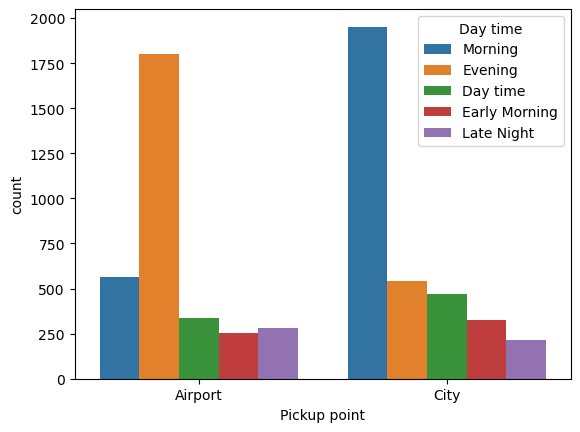

In [ ]:
'''
We coud predict from the graph that more people request at evening from airport. However in city alot of people request at mornig
for exmaple work, school,..
'''
sns.countplot(x='Pickup point', data=data, hue='Day time')

In [ ]:
#i extracte the day name .
data['Day']=data['Request timestamp'].dt.day_name()
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour,Day time,Day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,Wednesday


(array([1367.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 2644.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 1353.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 1381.]),
 array([0.   , 0.075, 0.15 , 0.225, 0.3  , 0.375, 0.45 , 0.525, 0.6  ,
        0.675, 0.75 , 0.825, 0.9  , 0.975, 1.05 , 1.125, 1.2  , 1.275,
        1.35 , 1.425, 1.5  , 1.575, 1.65 , 1.725, 1.8  , 1.875, 1.95 ,
        2.025, 2.1  , 2.175, 2.25 , 2.325, 2.4  , 2.475, 2.55 , 2.625,
        2.7  , 2.775, 2.85 , 2.925, 3.   ]),
 <BarContainer object of 40 artists>)

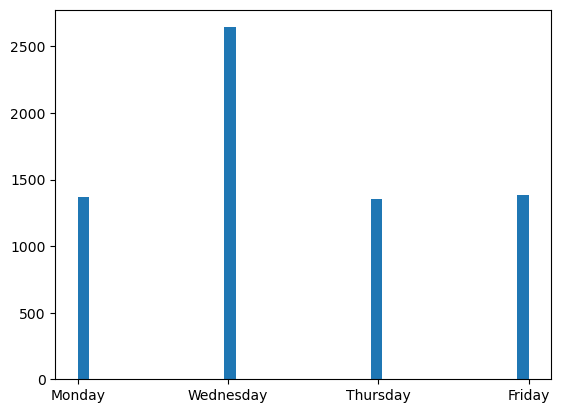

In [ ]:
'''We coud see that people request in Monday, Wednesday, Thursday and Friday.It clearly
shows that most people request on wednesday with 39% and the rest of days equally by 20%
'''
plt.hist(data['Day'],bins=40)

<Axes: ylabel='count'>

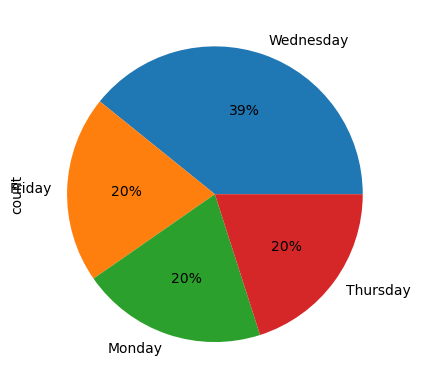

In [ ]:
data['Day'].value_counts().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='Day time', ylabel='count'>

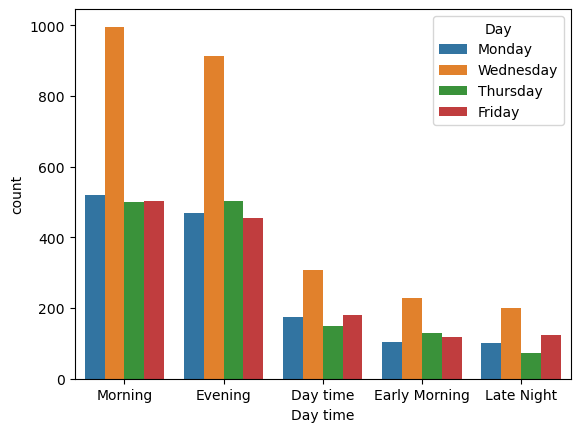

In [ ]:
'''
This graph shows the relation between the days and time requested.
I predict that wednesday is very high Morning and Evening, as it is in the week days
People sign in for jobs at morning and school at morning, and sign out at jobs at evening that make sense why
more people request at that time.
'''
sns.countplot(x='Day time', data=data,hue='Day')